In [4]:
import pandas as pd

benchmark_df = pd.read_csv('../results/mnist-benchmark.csv')
measure_df = pd.read_csv('../results/measure-time-mnist.csv')

measure_df['query_time'] = benchmark_df['query_time']
measure_df.tail()

,predict_time,g_range,l_range,build_time,query_time
11,0.003015,7,7,12.683974,0.080929
12,0.003137,10,1,12.683974,0.029633
13,0.003160,10,3,12.683974,0.058405
14,0.003201,10,5,12.683974,0.077011
15,0.003277,10,7,12.683974,0.089202


<Axes: xlabel='l_range'>

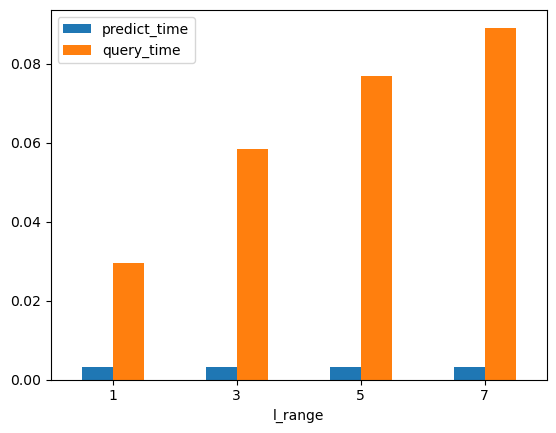

In [40]:
import seaborn as sns
data = measure_df.query('g_range == 10')
df = pd.DataFrame({'predict_time': data['predict_time'], 'query_time': data['query_time'], 'l_range': data['l_range']})
df.plot.bar(x="l_range", rot=0)

In [39]:
th_benchmark_df = pd.read_csv('../results/mnist-benchmark-threshold.csv')
th_measure_df = pd.read_csv('../results/measure-time-threshold-mnist.csv')

th_measure_df['query_time'] = th_benchmark_df['query_time']
th_measure_df.tail()

,predict_time,g_range,threshold,build_time,query_time
11,0.003292,7,0.05,12.683974,0.058062
12,0.003346,10,0.50,12.683974,0.036565
13,0.003469,10,0.10,12.683974,0.050008
14,0.003520,10,0.07,12.683974,0.057228
15,0.003439,10,0.05,12.683974,0.064632


<Axes: xlabel='threshold'>

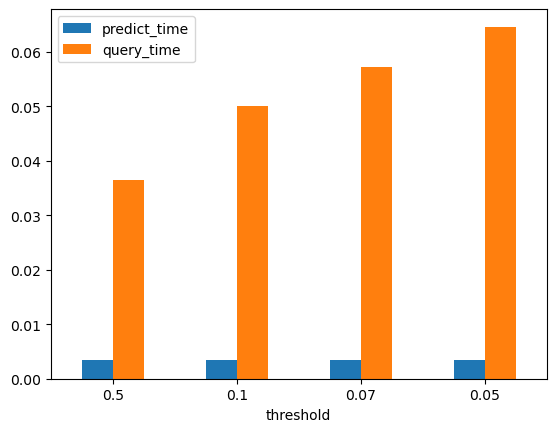

In [42]:
th_data = th_measure_df.query('g_range == 10')
th_data = pd.DataFrame({'predict_time': th_data['predict_time'], 'query_time': th_data['query_time'], 'threshold': th_data['threshold']})
th_data.plot.bar(x="threshold", rot=0)

In [44]:

benchmark_df = pd.read_csv('../results/mnist-benchmark.csv')
measure_df = pd.read_csv('../results/measure-time-mnist.csv')

measure_df['recall'] = benchmark_df['recall']
measure_df['method'] = 'top_l_range'
measure_df.tail()

,predict_time,g_range,l_range,build_time,recall,method
11,0.003015,7,7,12.683974,0.9272,top_l_range
12,0.003137,10,1,12.683974,0.6585,top_l_range
13,0.003160,10,3,12.683974,0.9092,top_l_range
14,0.003201,10,5,12.683974,0.9618,top_l_range
15,0.003277,10,7,12.683974,0.9763,top_l_range


In [45]:
th_benchmark_df = pd.read_csv('../results/mnist-benchmark-threshold.csv')
th_measure_df = pd.read_csv('../results/measure-time-threshold-mnist.csv')

th_measure_df['recall'] = th_benchmark_df['recall']
th_measure_df['method'] = 'threshold'
th_measure_df.tail()

,predict_time,g_range,threshold,build_time,recall,method
11,0.003292,7,0.05,12.683974,0.9026,threshold
12,0.003346,10,0.50,12.683974,0.8186,threshold
13,0.003469,10,0.10,12.683974,0.9013,threshold
14,0.003520,10,0.07,12.683974,0.9273,threshold
15,0.003439,10,0.05,12.683974,0.9487,threshold


<Axes: xlabel='recall', ylabel='predict_time'>

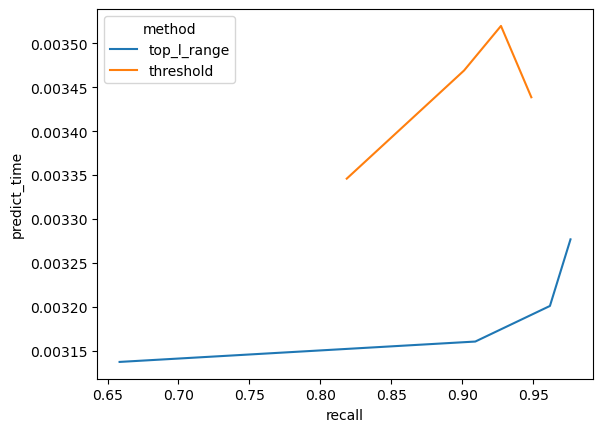

In [58]:
import seaborn as sns
df1 = measure_df.query('g_range == 10')[['method', 'recall', 'predict_time']]
df2= th_measure_df.query('g_range == 10')[['method', 'recall', 'predict_time']]
cmp_df = pd.concat([df1, df2])

sns.lineplot(x="recall", y="predict_time", hue="method", markers=True, data=cmp_df)